In [ ]:
from google.colab import drive
import os
import sys
import pandas as pd
import numpy as np
drive.mount('/content/drive/',force_remount=True)
#helper directory
sys.path.insert(0,'/content/drive/MyDrive/BackUp_RL_CodeBase/helpers')
#file directory
os.chdir('/content/drive/MyDrive/BackUp_RL_CodeBase/')
#saving directory
path = os.getcwd()
print(path)


Mounted at /content/drive/
/content/drive/MyDrive/BackUp_RL_CodeBase


# load trianing shedule


In [ ]:
schedule=pd.read_excel("trainingSchedule.xlsx",sheet_name = 'Value',index_col='Id')
schedule

# load training results

In [ ]:
# result from 0 to 5, training from 2015 to 2020
resultDir=(schedule.LogDir + 'Tuned20152020/'+ schedule.LogFolder).iloc[0]
result = pd.read_csv(f'{path}{resultDir}/progress.csv')
monitor = pd.read_csv(f'{path}{resultDir}/monitor.csv',index_col=False,skiprows=1)

In [ ]:
result

,time/iterations,train/policy_gradient_loss,train/learning_rate,train/entropy_loss,train/value_loss,train/approx_kl,train/explained_variance,train/clip_range,train/loss,rollout/ep_rew_mean,time/fps,train/std,time/total_timesteps,train/clip_fraction,time/time_elapsed,rollout/ep_len_mean,train/reward,train/n_updates
0,258,-0.016374,0.0001,-59.624097,0.000595,0.005493,0.999850,0.2,-0.037400,296.378346,47,1.000677,66564,0.009302,1395,258.0,0.041702,1285
1,516,-0.019991,0.0001,-59.464804,0.001549,0.011691,0.998509,0.2,-0.041786,306.595039,47,0.996941,133128,0.056589,2782,258.0,0.041831,2575
2,774,-0.022362,0.0001,-59.409177,0.000372,0.013112,0.999726,0.2,-0.048734,336.938247,48,0.995636,199692,0.045736,4153,258.0,0.060162,3865


In [ ]:
# result.plot(subplots=True, layout=(5,5),figsize=(22,20))

In [ ]:
print(f'{path}{resultDir}')

/content/drive/MyDrive/BackUp_RL_CodeBase/log_RL/Tuned20152020/PPO_0_1000_1415_1212_AS_D252


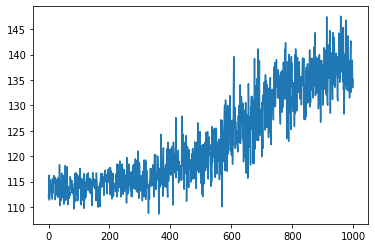

In [ ]:
(monitor.r/monitor.l*100).rolling(1).mean().plot()

In [ ]:
result

,time/iterations,train/policy_gradient_loss,train/learning_rate,train/entropy_loss,train/value_loss,train/approx_kl,train/explained_variance,train/clip_range,train/loss,rollout/ep_rew_mean,time/fps,train/std,time/total_timesteps,train/clip_fraction,time/time_elapsed,rollout/ep_len_mean,train/reward,train/n_updates
0,258,-0.016374,0.0001,-59.624097,0.000595,0.005493,0.999850,0.2,-0.037400,296.378346,47,1.000677,66564,0.009302,1395,258.0,0.041702,1285
1,516,-0.019991,0.0001,-59.464804,0.001549,0.011691,0.998509,0.2,-0.041786,306.595039,47,0.996941,133128,0.056589,2782,258.0,0.041831,2575
2,774,-0.022362,0.0001,-59.409177,0.000372,0.013112,0.999726,0.2,-0.048734,336.938247,48,0.995636,199692,0.045736,4153,258.0,0.060162,3865


# Aggregate Reward from Monitor File

In [ ]:
# result from 0 to 5, training from 2015 to 2020
df_all_monitor = pd.DataFrame(columns=['2015','2016','2017','2018','2019','2020'])
for i in range(6):
  resultDir=(schedule.LogDir + 'Tuned20152020/'+ schedule.LogFolder).iloc[i]
  monitori = pd.read_csv(f'{path}{resultDir}/monitor.csv',index_col=False,skiprows=1)
  reward = np.round(monitori.r/monitori.l *100,2)
  col = df_all_monitor.columns[i] 
  df_all_monitor[col]= reward
  # df_all_monitor = df_all_monitor.append(monitori,ignore_index=True)

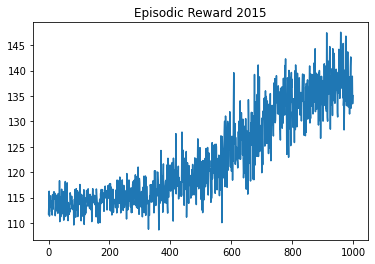

In [34]:
df_all_monitor['2015'].rolling(1).mean().plot(title = 'Episodic Reward 2015')

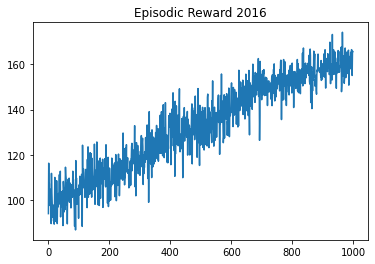

In [35]:
df_all_monitor['2016'].rolling(1).mean().plot(title = 'Episodic Reward 2016')

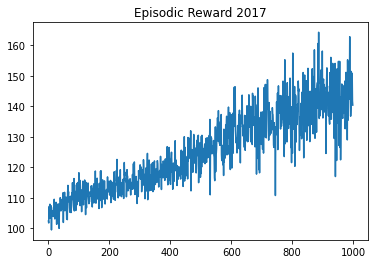

In [36]:
df_all_monitor['2017'].rolling(1).mean().plot(title = 'Episodic Reward 2017')

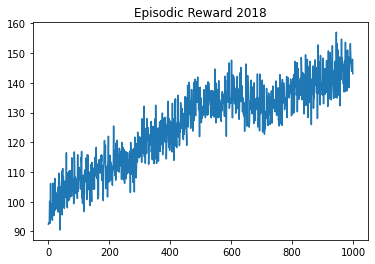

In [37]:
df_all_monitor['2018'].rolling(1).mean().plot(title = 'Episodic Reward 2018')

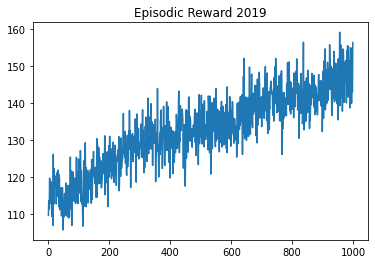

In [38]:
df_all_monitor['2019'].rolling(1).mean().plot(title = 'Episodic Reward 2019')